#  Project 2. Low Light Image Enhancement Methods: Gray Transformations and Histogram Equalization

Import dependecies for Python to implement the algorithms.

In [100]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Read the image and show it.


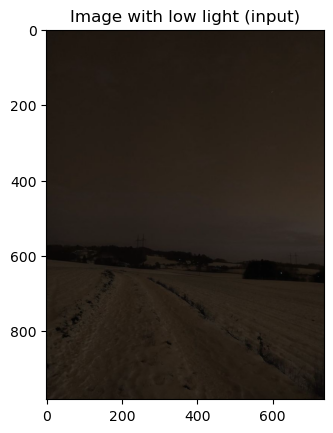

In [101]:
img = cv2.imread("la_porumb.jpg", cv2.IMREAD_COLOR)

plt.imshow(img)
plt.title('Image with low light (input)')
plt.show()

Show image on every channel.

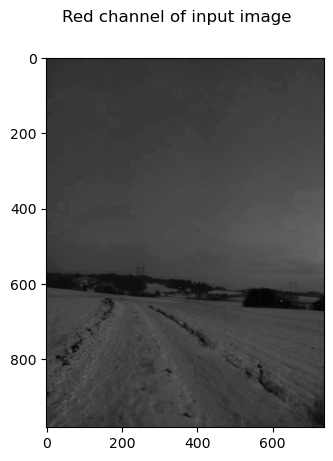

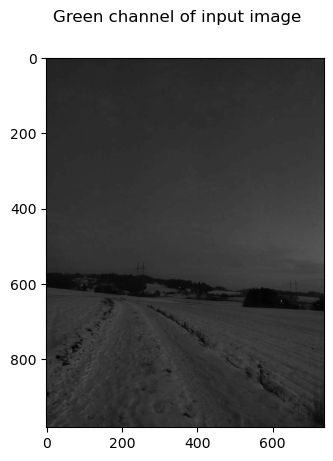

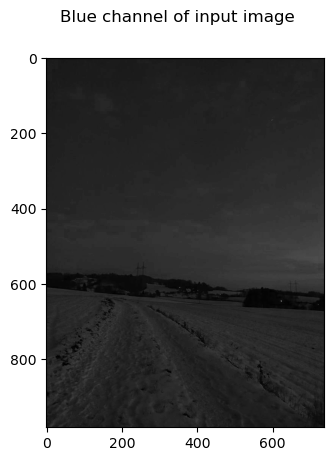

In [102]:
plt.figure()
plt.imshow(img[:,:,0], cmap = 'gray')
plt.suptitle('Red channel of input image')
plt.show()

plt.figure()
plt.imshow(img[:,:,1], cmap = 'gray')
plt.suptitle('Green channel of input image')
plt.show()

plt.figure()
plt.imshow(img[:,:,2], cmap = 'gray')
plt.suptitle('Blue channel of input image')
plt.show()

Show histogram of every channel (red, green, blue).

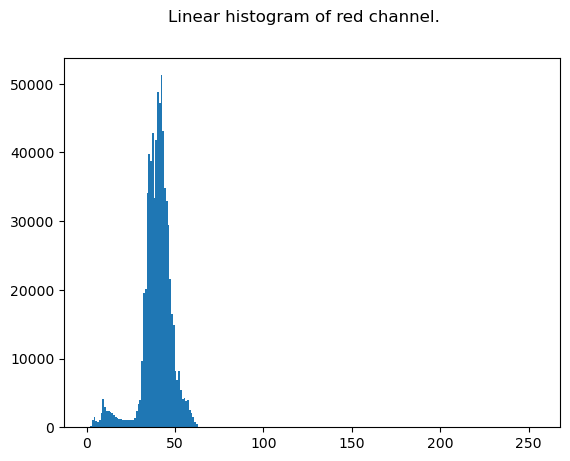

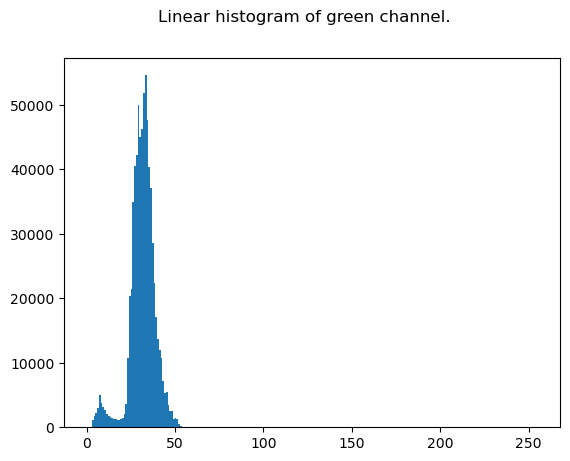

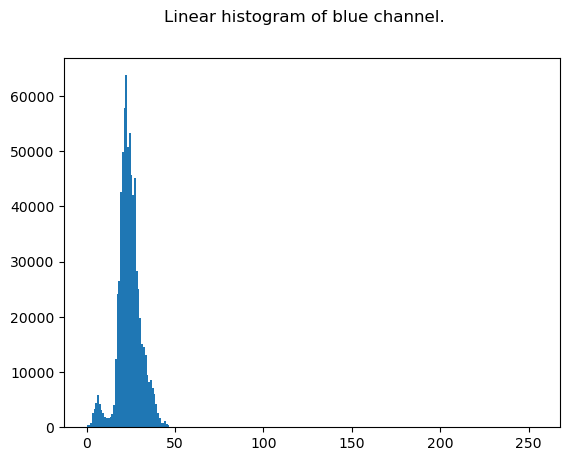

In [103]:
plt.hist(img[:,:,0].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of red channel.')
plt.show()

plt.hist(img[:,:,1].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of green channel.')
plt.show()

plt.hist(img[:,:,2].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of blue channel.')
plt.show()

## First approach. Apply gray transformations on every channel

Apply linear transformation $g\left( x, y \right)= \frac{f\left( x, y \right)-f_{min}}{f_{max}-f_{min}}\left( g_{max}-g_{min} \right)+g_{min}$ on image.

In [104]:
img_normalized = cv2.normalize(img, None, 0, 255,
cv2.NORM_MINMAX, dtype=cv2.CV_8U)

Show image on every channel.

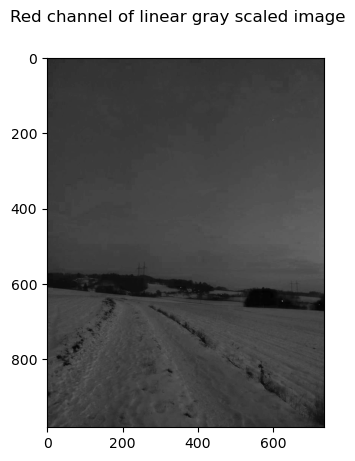

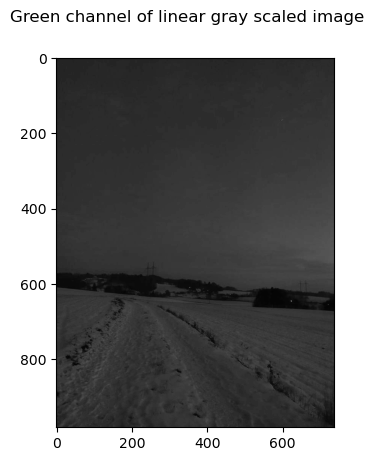

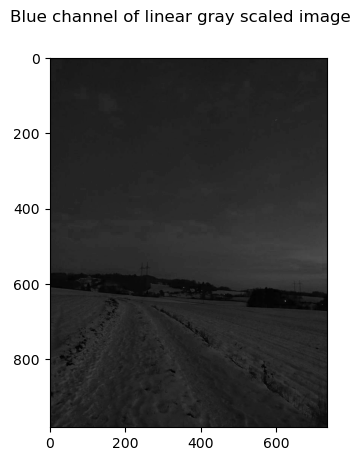

In [105]:
plt.figure()
plt.imshow(img_normalized[:,:,0], cmap = 'gray')
plt.suptitle('Red channel of linear gray scaled image')
plt.show()

plt.figure()
plt.imshow(img_normalized[:,:,1], cmap = 'gray')
plt.suptitle('Green channel of linear gray scaled image')
plt.show()

plt.figure()
plt.imshow(img_normalized[:,:,2], cmap = 'gray')
plt.suptitle('Blue channel of linear gray scaled image')
plt.show()

Show histogram on every channel (red, green, blue).

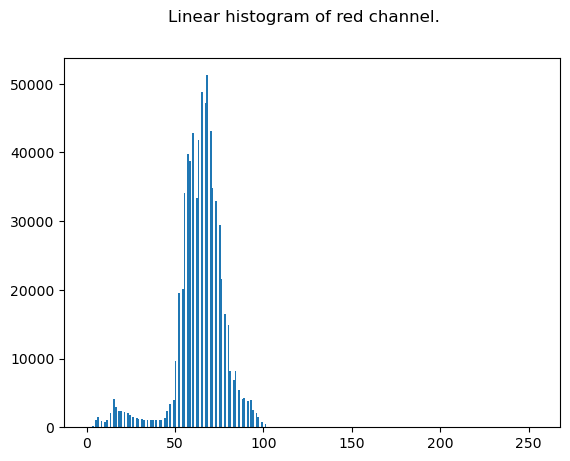

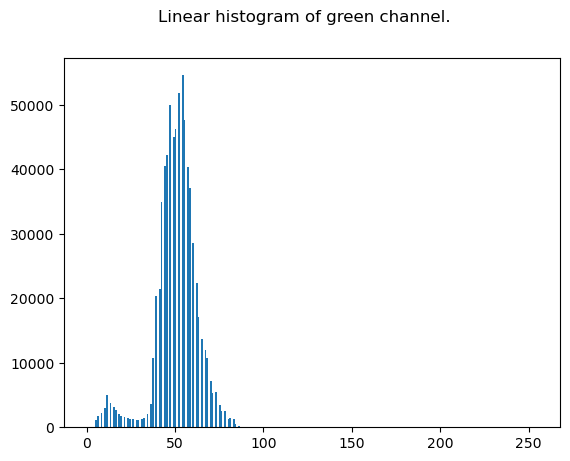

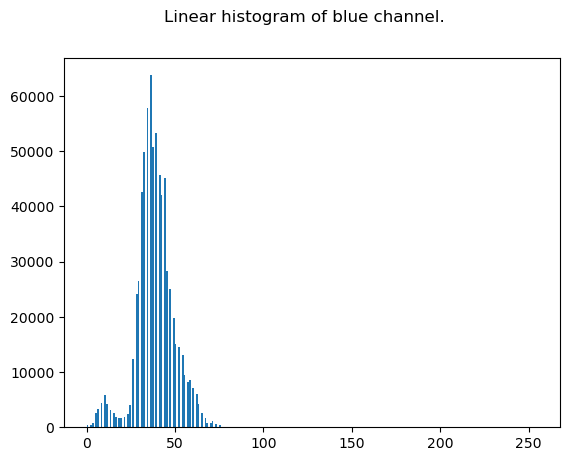

In [106]:
plt.hist(img_normalized[:,:,0].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of red channel.')
plt.show()

plt.hist(img_normalized[:,:,1].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of green channel.')
plt.show()

plt.hist(img_normalized[:,:,2].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of blue channel.')
plt.show()

Show modified image on RGB format.

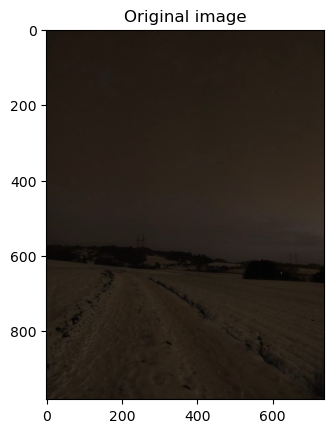

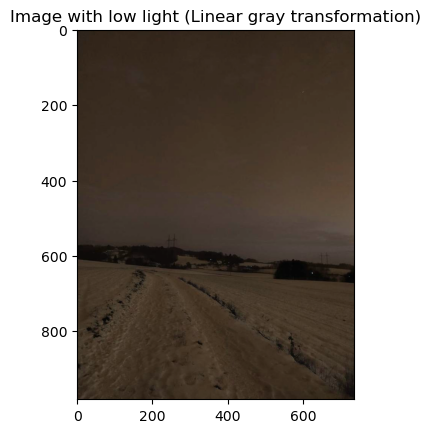

In [107]:
plt.figure()

plt.imshow(img)
plt.title('Original image')
plt.show()

plt.imshow(img_normalized)
plt.title('Image with low light (Linear gray transformation)')
plt.show()

Unfortunately, this method doesn't provide the required results. Therefore, we will use another approach, using a logarithmic transformation like this $g\left( x, y \right)=\log\left( 1+c\times f\left( x, y \right) \right)$.

In [108]:
# Apply log transformation method 
c = 255 / np.log(1 + np.max(img)) 
log_image = c * (np.log(img + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8)

Show image on every channel.

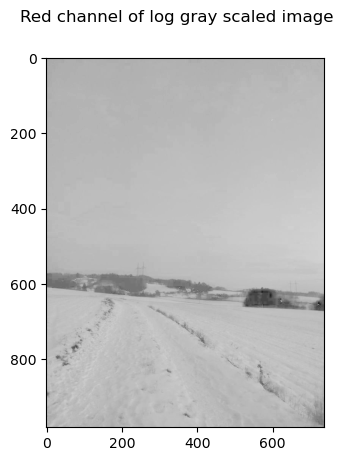

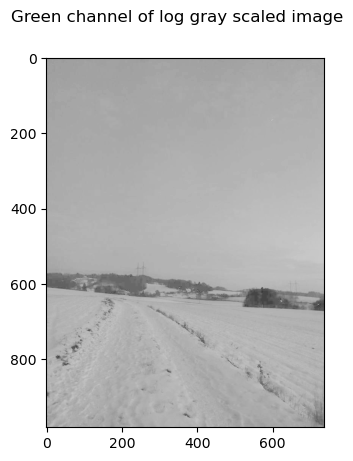

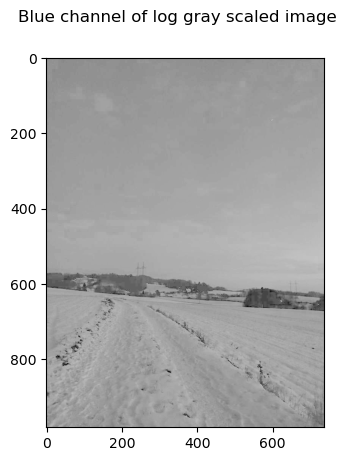

In [109]:
plt.figure()
plt.imshow(log_image[:,:,0], cmap = 'gray')
plt.suptitle('Red channel of log gray scaled image')
plt.show()

plt.figure()
plt.imshow(log_image[:,:,1], cmap = 'gray')
plt.suptitle('Green channel of log gray scaled image')
plt.show()

plt.figure()
plt.imshow(log_image[:,:,2], cmap = 'gray')
plt.suptitle('Blue channel of log gray scaled image')
plt.show()

Show histogram on every channel (red, green, blue).

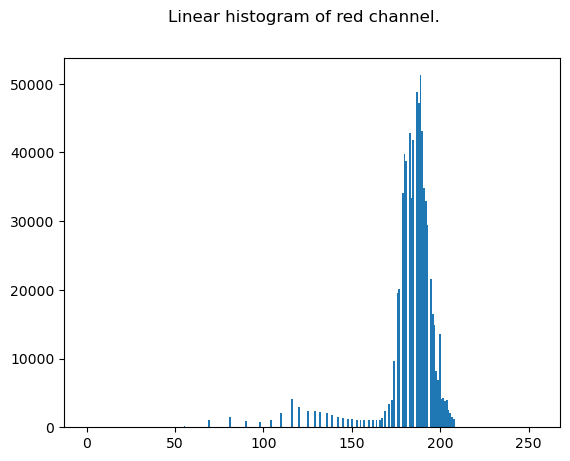

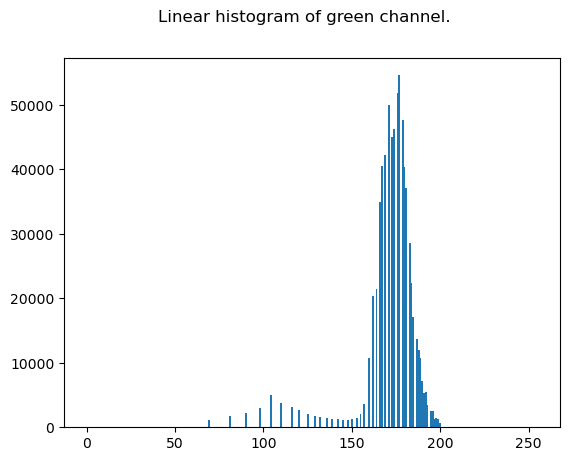

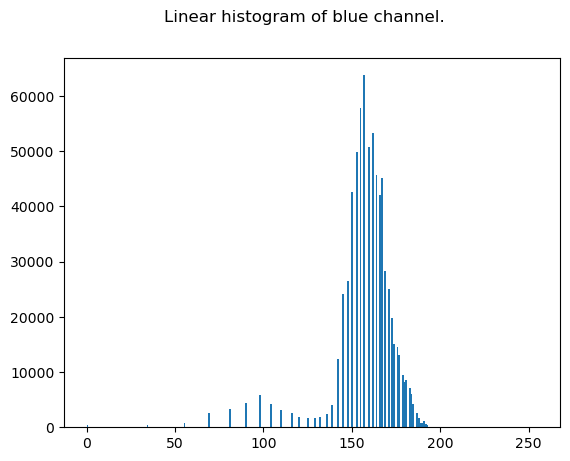

In [110]:
plt.hist(log_image[:,:,0].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of red channel.')
plt.show()

plt.hist(log_image[:,:,1].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of green channel.')
plt.show()

plt.hist(log_image[:,:,2].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of blue channel.')
plt.show()

Show modified image on RGB format.

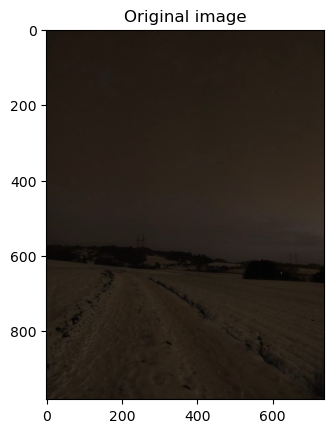

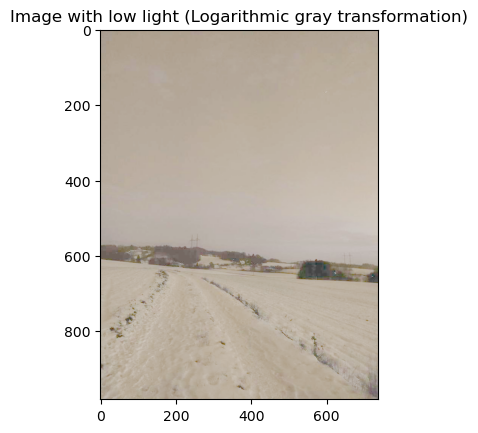

In [111]:
plt.figure()

plt.imshow(img)
plt.title('Original image')
plt.show()

plt.imshow(log_image)
plt.title('Image with low light (Logarithmic gray transformation)')
plt.show()

## Second approach. Apply histogram equalization algorithm

In the first case, we will apply histogram equalization on every channel from RGB.


In [112]:
R, G, B = cv2.split(img)

output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

Show histogram of every channel (red, green, blue).

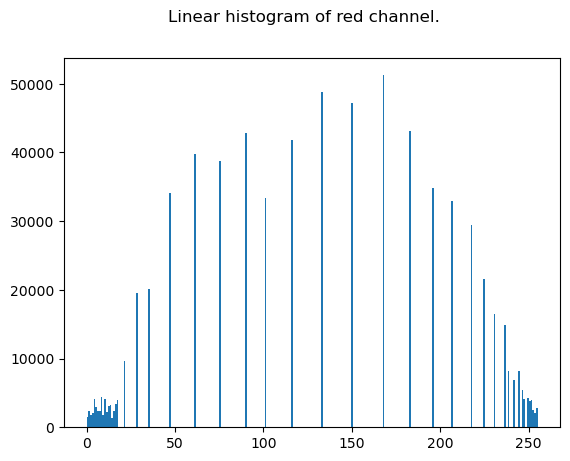

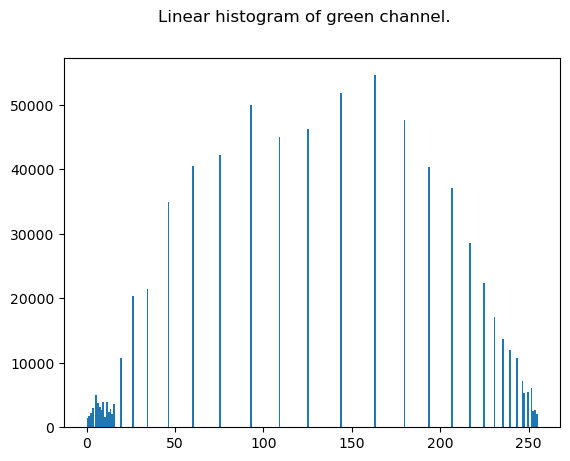

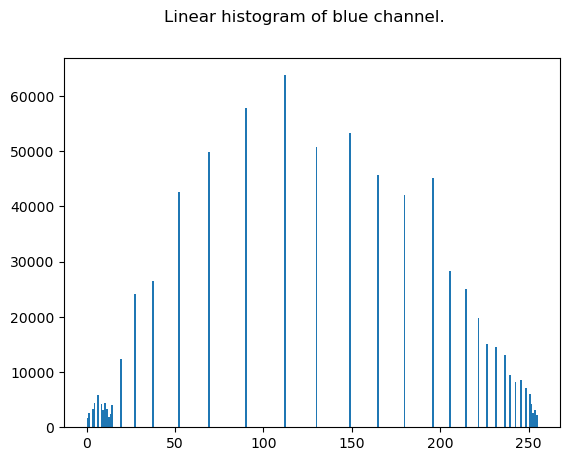

In [113]:
plt.hist(output1_R.ravel(), 256, [0,255])
plt.suptitle('Linear histogram of red channel.')
plt.show()

plt.hist(output1_G.ravel(), 256, [0,255])
plt.suptitle('Linear histogram of green channel.')
plt.show()

plt.hist(output1_B.ravel(), 256, [0,255])
plt.suptitle('Linear histogram of blue channel.')
plt.show()

Show image on every channel.

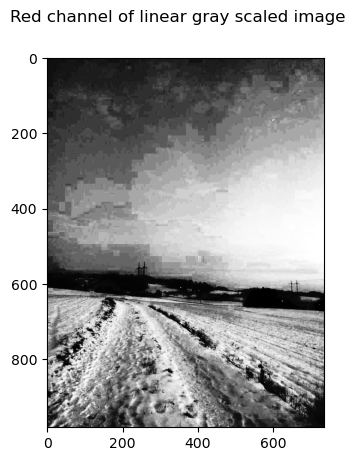

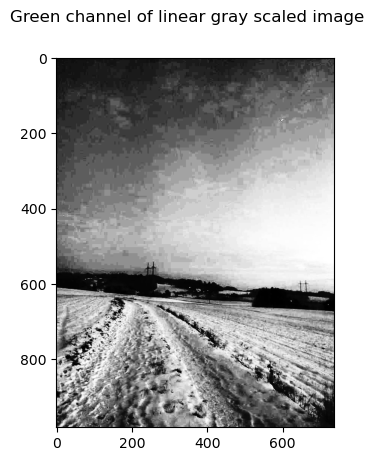

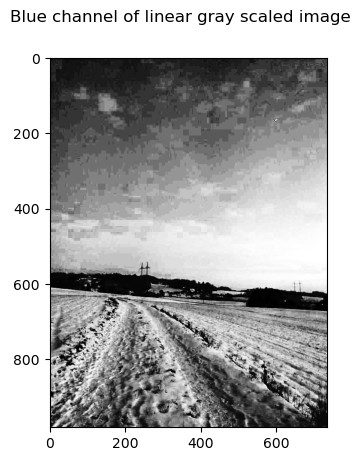

In [114]:
plt.figure()
plt.imshow(output1_R, cmap = 'gray')
plt.suptitle('Red channel of linear gray scaled image')
plt.show()

plt.figure()
plt.imshow(output1_G, cmap = 'gray')
plt.suptitle('Green channel of linear gray scaled image')
plt.show()

plt.figure()
plt.imshow(output1_B, cmap = 'gray')
plt.suptitle('Blue channel of linear gray scaled image')
plt.show()

Show modified image on RGB format.

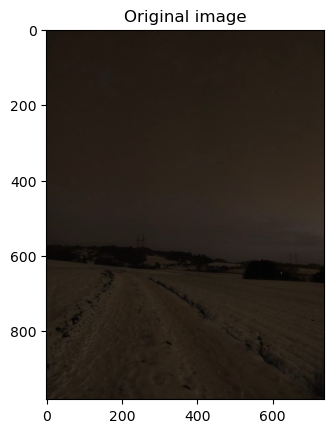

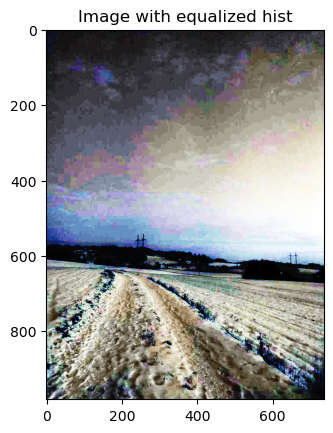

In [115]:
img_eq_hist = cv2.merge((output1_R, output1_G, output1_B))

plt.figure()

plt.imshow(img)
plt.title('Original image')
plt.show()

plt.imshow(img_eq_hist)
plt.title('Image with equalized hist')
plt.show()

 In the second case, we will convert image to YCrCb and we will apply histogram equalization on Intensity channels.

In [116]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

Show image on intensity channel.

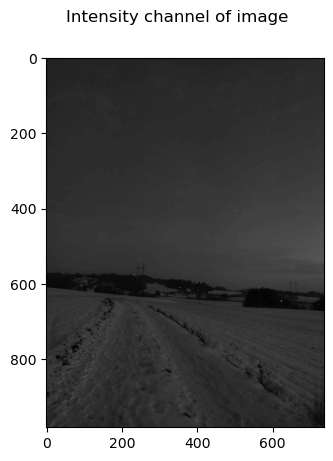

In [117]:
plt.figure()
plt.imshow(img_hsv[:,:,0], cmap = 'gray')
plt.suptitle('Intensity channel of image')
plt.show()

Show histogram of intensity channel.

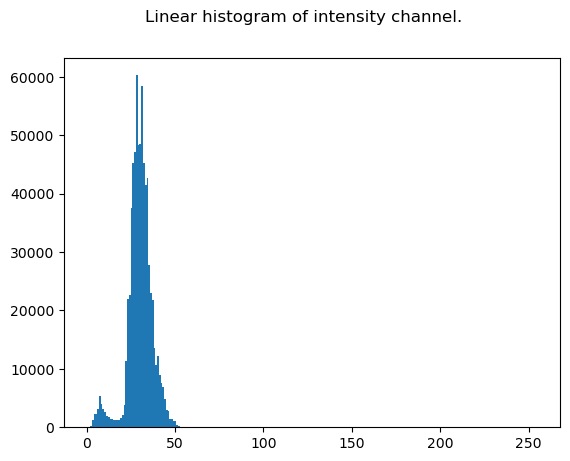

In [118]:
plt.hist(img_hsv[:,:,0].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of intensity channel.')
plt.show()

Equalize intensity channel.


In [119]:
img_hsv[:,:,0] = cv2.equalizeHist(img_hsv[:,:,0])

Show image on intensity channel.

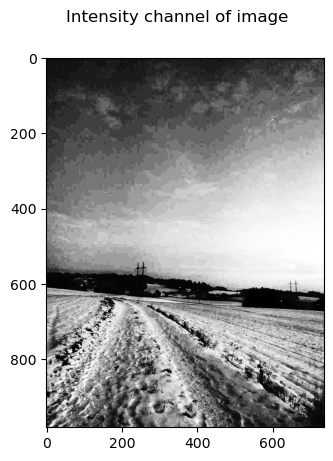

In [120]:
plt.figure()
plt.imshow(img_hsv[:,:,0], cmap = 'gray')
plt.suptitle('Intensity channel of image')
plt.show()

Show histogram of intensity channel.

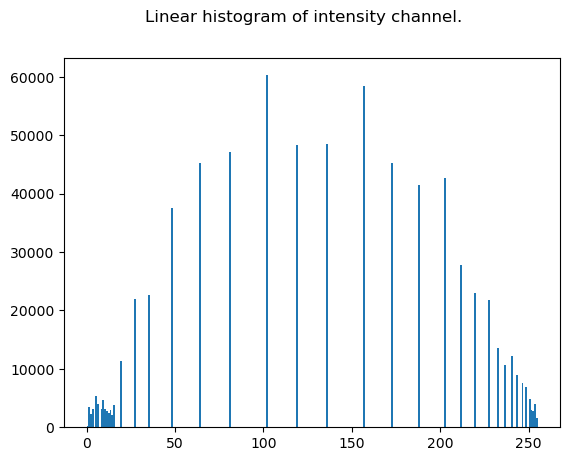

In [121]:
plt.hist(img_hsv[:,:,0].ravel(), 256, [0,255])
plt.suptitle('Linear histogram of intensity channel.')
plt.show()

Convert image back to RGB and show it.

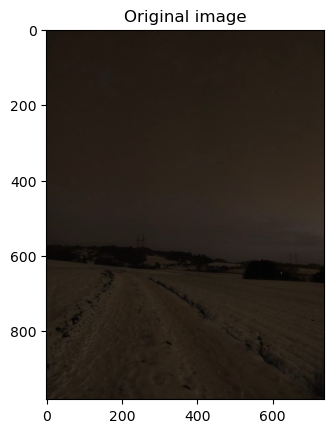

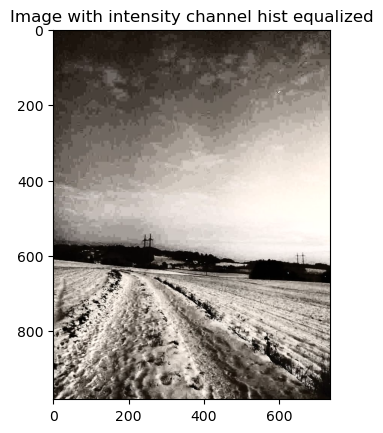

In [122]:
img_converted_back = cv2.cvtColor(img_hsv, cv2.COLOR_YCrCb2BGR)

plt.figure()

plt.imshow(img)
plt.title('Original image')
plt.show()

plt.imshow(img_converted_back)
plt.title('Image with intensity channel hist equalized')
plt.show()